Pandas Basics
--
1. What Is Pandas?
--
 Pandas is a Python library designed for fast, efficient data analysis.
 Think of Pandas as a wrapper for numpy array which is very efficient for:

- Reading in data
- Manipulating Rows and Columns
- Adjusting indices
- Working with dates and time series
- Sorting, grouping, re-ordering and general data munging (cleaning)


1.1 Series
---

 The simplest pandas data type is a series.

In [31]:
import pandas as pd
import numpy as np

In [72]:
s = pd.Series(np.random.rand(5))
s

0    0.686105
1    0.316433
2    0.782552
3    0.812987
4    0.984340
dtype: float64

- A series is a one-dimensional labeled array capable of holding any data type.
- Made up of a one-dimensional array of data and an one-dimensional index.

1.2 Accessing Elements
---
- Elements can be accessed using the standad [ ] notation

In [73]:
s[0:]

0    0.686105
1    0.316433
2    0.782552
3    0.812987
4    0.984340
dtype: float64

In [74]:
s[3:]

3    0.812987
4    0.984340
dtype: float64

In [75]:
s[:3]

0    0.686105
1    0.316433
2    0.782552
dtype: float64

In [76]:
print(s[4])

0.984340151828


- we can also re-index the series

In [77]:
s.index = ['a','b','c','d','e']
s

a    0.686105
b    0.316433
c    0.782552
d    0.812987
e    0.984340
dtype: float64

In [78]:
print(s['c'],s[2])

0.78255227323 0.78255227323


1.3 Manipulating Series
---
- There are a myriad of options for manipulating series, here are a few examples

In [39]:
s.describe()

count    5.000000
mean     0.466826
std      0.272551
min      0.005669
25%      0.451906
50%      0.581737
75%      0.593453
max      0.701366
dtype: float64

- There are also dot commands to apply functions across your series
- Dot command functions can be viewed by placing a period after the data object and then pressing 'Tab'

In [40]:
np.exp(s)

a    2.016505
b    1.789143
c    1.810228
d    1.005685
e    1.571304
dtype: float64

In [41]:
s.sort()
s

d    0.005669
e    0.451906
b    0.581737
c    0.593453
a    0.701366
dtype: float64

1.4 Time Series
---
- We've seen that an index of a series can really be any list we want. What about dates?

In [79]:
pd.date_range?

In [43]:
s.index = pd.date_range('02/01/2013', periods=5, freq ='AS')
s

2014-01-01    0.005669
2015-01-01    0.451906
2016-01-01    0.581737
2017-01-01    0.593453
2018-01-01    0.701366
Freq: AS-JAN, dtype: float64

- Working with Dates and Times can get a little complicated refer to http://pandas.pydata.org/pandas-docs/stable/timeseries.html for more examples

- Pandas also allows us to access data from Fred, Yahoo! Finance, Google Finance,  and Fama-French
- Keep in mind you will need to know the indicator code that you are searching for

In [102]:
import pandas.io.data as web
unrate = web.DataReader('UNRATE', 'fred', '01/01/2006', '01/01/2013')
unrate.head()

web.DataReader?

1.5 Basic Time Series Plots
--

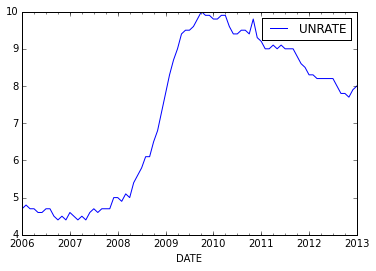

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

unrate.plot()

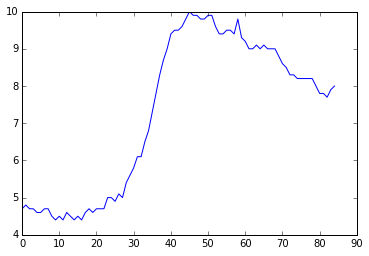

In [46]:
plt.plot(unrate)


1.6 Resampling
---
- A nice feature of pandas time series is the ability to resample the time series
- Currently the unemployement rate data is monthly.
- Transforming it into quarterly data is easy
- There are also many ways to do this, pandas gives you several options

In [47]:
unrate_q = unrate.resample('Q') 
unrate_q.head(5)

,UNRATE
DATE,
2006-03-31,4.733333
2006-06-30,4.633333
2006-09-30,4.633333
2006-12-31,4.433333
2007-03-31,4.500000


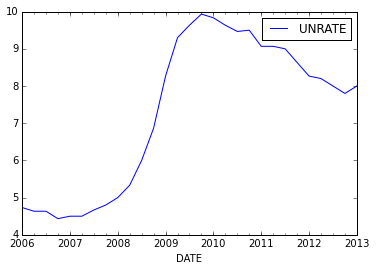

In [81]:
unrate_q.plot()

2. Data Frames
---
- Most comonly used object in pandas is a data frame
- Think of the data fame as a 2-dimensional array with lables for both the columns and the rows
- Alternatively as a dictionary of Series

In [85]:
df = pd.DataFrame(np.random.rand(6,4),columns = ['A','B','C','D'])
df

,A,B,C,D
0,0.995667,0.223155,0.391748,0.140027
1,0.374638,0.674075,0.762000,0.702379
2,0.834058,0.177438,0.007578,0.727800
3,0.935155,0.686622,0.293424,0.138093
4,0.793352,0.492017,0.340160,0.491542
5,0.688309,0.477351,0.700457,0.324631


2.1 Accessing Elements
---
- Element access is very similar to series and numpy arrays

In [86]:
df[0:2]

,A,B,C,D
0,0.995667,0.223155,0.391748,0.140027
1,0.374638,0.674075,0.762000,0.702379


In [87]:
df['A'] #this returns a series!

0    0.995667
1    0.374638
2    0.834058
3    0.935155
4    0.793352
5    0.688309
Name: A, dtype: float64

In [88]:
df.A

0    0.995667
1    0.374638
2    0.834058
3    0.935155
4    0.793352
5    0.688309
Name: A, dtype: float64

In [89]:
df.A[0] = 'NaN'
df.head(3)

,A,B,C,D
0,NaN,0.223155,0.391748,0.140027
1,0.374638,0.674075,0.762000,0.702379
2,0.834058,0.177438,0.007578,0.727800


2.2 Modifying Data
---
- As with series we can apply functions to data frames

In [90]:
np.exp(df[['A','B','D']])

,A,B,D
0,NaN,1.250015,1.150305
1,1.454465,1.962217,2.018550
2,2.302645,1.194154,2.070520
3,2.547607,1.986992,1.148082
4,2.210794,1.635612,1.634836
5,1.990348,1.611800,1.383521


- Or we can describe the data

In [91]:
df.describe()

,A,B,C,D
count,5.000000,6.000000,6.000000,6.000000
mean,0.725102,0.455110,0.415895,0.420745
std,0.214959,0.216474,0.278857,0.263266
min,0.374638,0.177438,0.007578,0.138093
25%,0.688309,0.286704,0.305108,0.186178
50%,0.793352,0.484684,0.365954,0.408087
75%,0.834058,0.628561,0.623280,0.649670
max,0.935155,0.686622,0.762000,0.727800


2.3 Boolean Indexing
---
- Another cool thing about pandas is the ability to index elements with booleans
- A natural question to ask is, "What on earth is a boolean?"
- Booleans are very simple variables that can be in only one of 2 states: True and False

In [92]:
y = 100 < 10 
print(y)

False


In [93]:
df[df.A > 0.5]

,A,B,C,D
2,0.834058,0.177438,0.007578,0.727800
3,0.935155,0.686622,0.293424,0.138093
4,0.793352,0.492017,0.340160,0.491542
5,0.688309,0.477351,0.700457,0.324631


In [94]:
df[df > 0.8] = 1
df

,A,B,C,D
0,NaN,0.223155,0.391748,0.140027
1,0.374638,0.674075,0.762000,0.702379
2,1.000000,0.177438,0.007578,0.727800
3,1.000000,0.686622,0.293424,0.138093
4,0.793352,0.492017,0.340160,0.491542
5,0.688309,0.477351,0.700457,0.324631


2.4 Grouping
-- 
- Grouping is a way of grouping results by values and performing analysis on those groups

In [59]:
df['gender'] = [1,1,2,1,2,1]
df

,A,B,C,D,gender
0,NaN,0.746894,0.762721,0.745840,1
1,0.250194,1.000000,0.386471,0.121626,1
2,0.285799,0.355162,0.629793,1.000000,2
3,0.376615,1.000000,0.228823,0.315895,1
4,0.223929,1.000000,1.000000,0.279270,2
5,1.000000,0.760402,0.196407,0.791588,1


In [60]:
df.groupby('gender').sum()

,A,B,C,D
gender,,,,
1,1.626810,3.507295,1.574422,1.974948
2,0.509728,1.355162,1.629793,1.279270


In [61]:
df.groupby('gender').describe()

A         B         C         D
gender                                              
1      count  3.000000  4.000000  4.000000  4.000000
       mean   0.542270  0.876824  0.393606  0.493737
       std    0.401414  0.142338  0.259703  0.327804
       min    0.250194  0.746894  0.196407  0.121626
       25%    0.313405  0.757025  0.220719  0.267328
       50%    0.376615  0.880201  0.307647  0.530867
       75%    0.688308  1.000000  0.480534  0.757277
       max    1.000000  1.000000  0.762721  0.791588
2      count  2.000000  2.000000  2.000000  2.000000
       mean   0.254864  0.677581  0.814896  0.639635
       std    0.043749  0.455970  0.261776  0.509633
       min    0.223929  0.355162  0.629793  0.279270
       25%    0.239396  0.516371  0.722345  0.459453
       50%    0.254864  0.677581  0.814896  0.639635
       75%    0.270331  0.838790  0.907448  0.819818
       max    0.285799  1.000000  1.000000  1.000000

2.5 Data Frames and Times Series
---
- Up to now we've been treating the index of a data frame as the sequence 0,1,2,. . .
- Could just as easily be a data range, which allows pandas to hold sequences of diferent sampling rates
- Recall the UNRATE sequence holds monthly data
- We can also obtain a GDP series from FRED

In [97]:
gdp = web.DataReader('GDP', 'fred', '01/01/2006', '01/01/2013')
gdp.head(5)

,GDP
DATE,
2006-01-01,13648.9
2006-04-01,13799.8
2006-07-01,13908.5
2006-10-01,14066.4
2007-01-01,14233.2


- GDP is quarterly data but we can still easily create a data frame that holds both

In [98]:
macro = unrate.join(gdp) #combines the two data frames using the index
macro.head(5)

,UNRATE,GDP
DATE,,
2006-01-01,4.7,13648.9
2006-02-01,4.8,NaN
2006-03-01,4.7,NaN
2006-04-01,4.7,13799.8
2006-05-01,4.6,NaN


- Why are there missing values for GDP?
- The dot command interpolate uses linear interpolation to fill in the missing values for gdp

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009BA90B8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009BF69B0>], dtype=object)

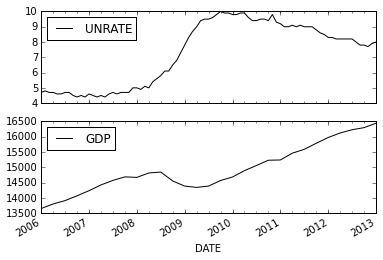

In [99]:
macro.interpolate().plot(subplots = True)

Practice Makes Perfect!
--
Thank you!
---